# Cambio Climático

He elegido enfocar mi trabajo en el cambio climático.

No hay medio de comunicación que no resalte la importancia del cambio climático en la actualidad y la nefasta repercusión que tiene (y tendrá) en el futuro.
Sin embargo, cada vez veo más gente en podcasts y redes sociales que ponen en duda el grado de gravedad del cambio climático.

De hecho, el otro día vi en televisión que presentaron un gráfico de temperaturas de los últimos 100 años (en España), y la temperatura de los últimos años era estable (no había apenas subida de temperatura).

Es por eso que he decidido enfocar mi trabajo en responder a la siguiente problemática:

¿Ha habido un aumento significativo de las temperaturas globales en el último siglo que respalde la afirmación de que el cambio climático es una amenaza grave?

Para ello he decidido usar este dataset:
- https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

### Climate Change: Earth Surface Temperature Data
Exploring global temperatures since 1750

Voy a centrarme:
 - Tendencias globales con especial enfoque en España y Noruega, para contrastar el cambio de temperaturas en un país nordico y un país tropical.
 - Tendencias en las distintas ciudades de España
 - Y relación Tierra-Mar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Cargamos los 3 datasets que vamos a usar
data_by_city = "GlobalLandTemperaturesByCity.csv"
data_by_country = "GlobalLandTemperaturesByCountry.csv"
data_global = "GlobalTemperatures.csv"

temperature_country =pd.read_csv(data_by_country)
temperature_by_city = pd.read_csv(data_by_city)
temperature_global = pd.read_csv(data_global)


temperature_by_city.describe(include="all")

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
count,8599212,8.235082e+06,8.235082e+06,8599212,8599212,8599212,8599212
unique,3239,NaN,NaN,3448,159,73,1227
top,2013-09-01,NaN,NaN,Springfield,India,36.17N,139.23E
freq,3510,NaN,NaN,9545,1014906,425455,129600
mean,NaN,1.672743e+01,1.028575e+00,NaN,NaN,NaN,NaN
std,NaN,1.035344e+01,1.129733e+00,NaN,NaN,NaN,NaN
min,NaN,-4.270400e+01,3.400000e-02,NaN,NaN,NaN,NaN
25%,NaN,1.029900e+01,3.370000e-01,NaN,NaN,NaN,NaN
50%,NaN,1.883100e+01,5.910000e-01,NaN,NaN,NaN,NaN
75%,NaN,2.521000e+01,1.349000e+00,NaN,NaN,NaN,NaN


In [2]:
temperature_country.describe(include="all")

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811.000000,545550.000000,577462
unique,3239,NaN,NaN,243
top,2013-09-01,NaN,NaN,Åland
freq,243,NaN,NaN,3239
mean,NaN,17.193354,1.019057,NaN
std,NaN,10.953966,1.201930,NaN
min,NaN,-37.658000,0.052000,NaN
25%,NaN,10.025000,0.323000,NaN
50%,NaN,20.901000,0.571000,NaN
75%,NaN,25.814000,1.206000,NaN


In [3]:
temperature_global.describe(include="all")

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
unique,3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1750-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,NaN,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,NaN,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,NaN,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,NaN,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,NaN,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000


En todos los dataframes, solo faltan valores en las temperaturas e incertidumbre, además todos tienen columnas similares.

Vamos primero a hacer un gráfico de la temperatura global para ver su tendencia.

### Tendencia de la Temperatura Global

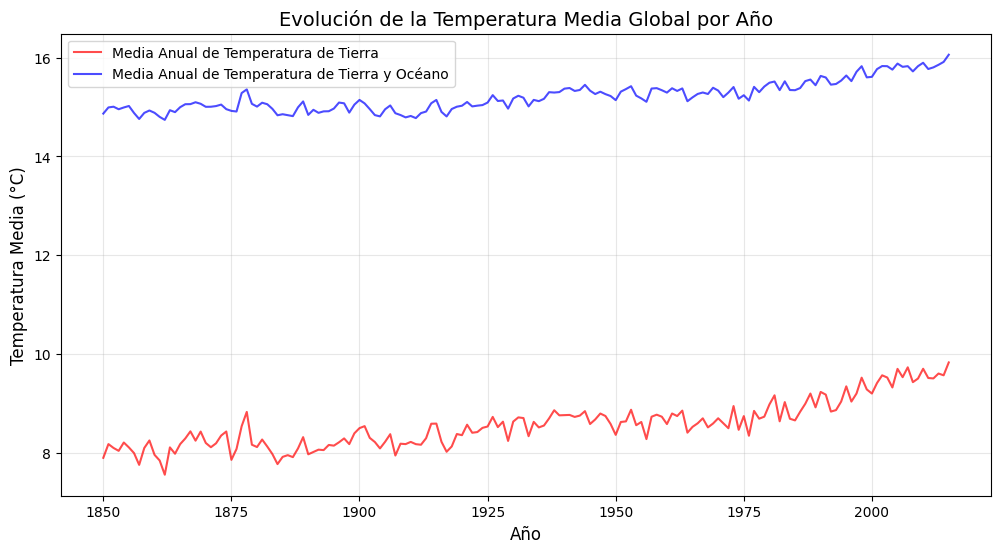

In [4]:
# Convertir la columna 'dt' a tipo datetime
temperature_global['dt'] = pd.to_datetime(temperature_global['dt'])

# Agregar una columna con el año
temperature_global['Year'] = temperature_global['dt'].dt.year

# Calcular la media anual para las columnas relevantes
annual_mean_temp = temperature_global.groupby('Year')[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].mean().dropna()

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(annual_mean_temp.index, 
         annual_mean_temp['LandAverageTemperature'], 
         label="Media Anual de Temperatura de Tierra", color='red', alpha=0.7)
plt.plot(annual_mean_temp.index, 
         annual_mean_temp['LandAndOceanAverageTemperature'], 
         label="Media Anual de Temperatura de Tierra y Océano", color='blue', alpha=0.7)
plt.title("Evolución de la Temperatura Media Global por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Temperatura Media (°C)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


Temperaturas Máximas y Mínimas

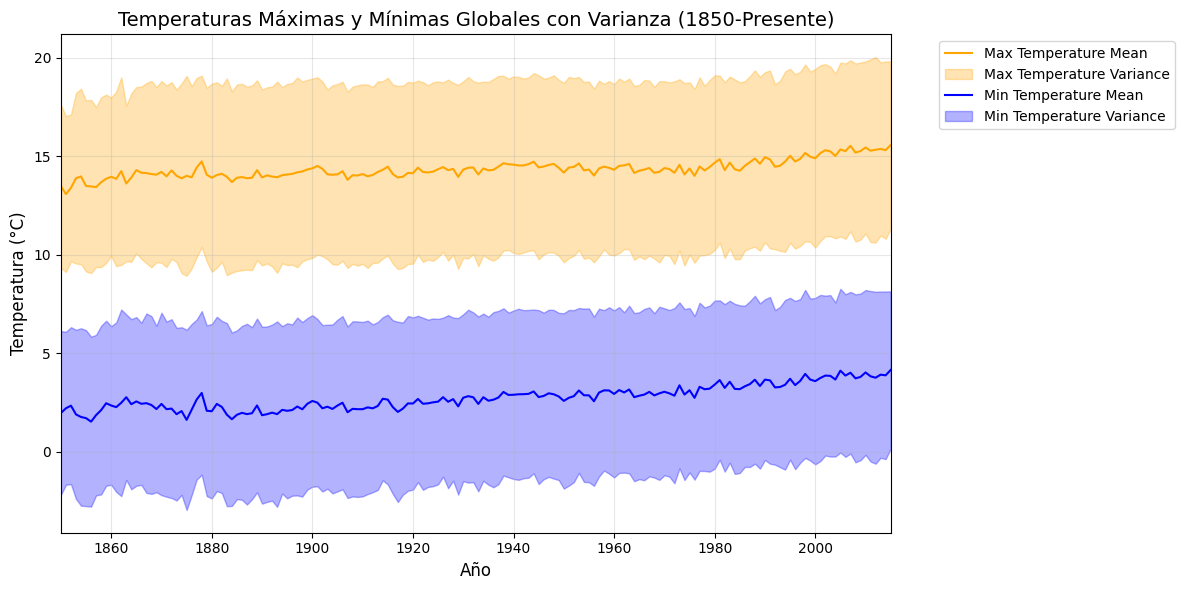

In [6]:
# Calcular la media y desviación estándar por año para las temperaturas máximas y mínimas
temp_stats = temperature_global.groupby('Year').agg({
    'LandMaxTemperature': ['mean', 'std'],
    'LandMinTemperature': ['mean', 'std']
}).reset_index()

# Renombrar columnas para facilidad
temp_stats.columns = ['Year', 'MaxTempMean', 'MaxTempStd', 'MinTempMean', 'MinTempStd']

# Graficar las temperaturas máximas y mínimas con bandas de varianza desde 1850
plt.figure(figsize=(12, 6))

# Temperatura máxima
plt.plot(temp_stats['Year'], temp_stats['MaxTempMean'], label='Max Temperature Mean', color='orange')
plt.xlim(1850, temp_stats['Year'].max())  # Limitar el eje X desde 1850

plt.fill_between(
    temp_stats['Year'],
    temp_stats['MaxTempMean'] - temp_stats['MaxTempStd'],
    temp_stats['MaxTempMean'] + temp_stats['MaxTempStd'],
    color='orange', alpha=0.3, label='Max Temperature Variance'
)

# Temperatura mínima
plt.plot(temp_stats['Year'], temp_stats['MinTempMean'], label='Min Temperature Mean', color='blue')
plt.fill_between(
    temp_stats['Year'],
    temp_stats['MinTempMean'] - temp_stats['MinTempStd'],
    temp_stats['MinTempMean'] + temp_stats['MinTempStd'],
    color='blue', alpha=0.3, label='Min Temperature Variance'
)

# Configuración del gráfico
plt.title('Temperaturas Máximas y Mínimas Globales con Varianza (1850-Presente)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Con estos dos gráficos, observamos que tanto la temperatura media como las mínimas y máximas han subido a lo largo del último siglo. Vamos a profundizar más en el análisis, enfocándonos en países con distinta geolocalización y filtrando por las distintas estaciones del año. Con esto intentaremos ver si la temperatura media ha subido durante todo el año, o simplemente en valores extremos de alguna estación que hacen subir la media.

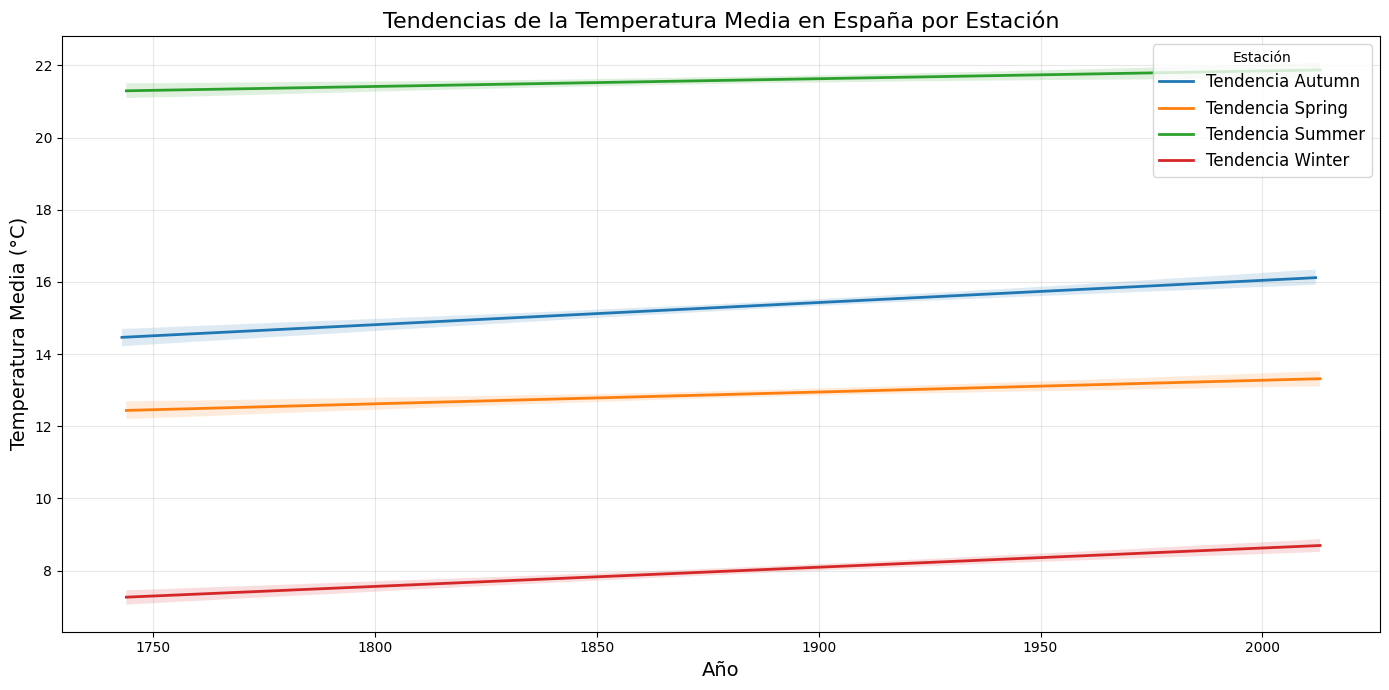

In [7]:
# Función para determinar la estación según el mes
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Filtrar datos de España
spain_data = temperature_by_city[temperature_by_city['Country'] == 'Spain'].copy()

# Convertir columna 'dt' a datetime y añadir columnas 'Month' y 'Year'
spain_data['dt'] = pd.to_datetime(spain_data['dt'])
spain_data['Month'] = spain_data['dt'].dt.month
spain_data['Year'] = spain_data['dt'].dt.year

# Añadir la columna de estaciones
spain_data['Season'] = spain_data['Month'].apply(get_season)

# Calcular la media de temperatura por estación y año
spain_seasonal = spain_data.groupby(['Year', 'Season'])['AverageTemperature'].mean().unstack()

# Crear el gráfico con tendencias
plt.figure(figsize=(14, 7))

# Calcular y graficar tendencias
for season in spain_seasonal.columns:
    sns.regplot(x=spain_seasonal.index, y=spain_seasonal[season], 
                label=f"Tendencia {season}", scatter=False, line_kws={'linewidth':2})

# Personalización del gráfico
plt.title("Tendencias de la Temperatura Media en España por Estación", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Temperatura Media (°C)", fontsize=14)
plt.legend(title="Estación", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Podemos ver que la temperatura media en verano sube menos que la temperatura media en invierno u otoño.
Esto podría indicar que tanto el verano como la primavera duran más. Es decir, que el verano acaba más tarde y que la primavera empieza antes.
Esto explicaría por qué la temperatura media en otoño e invierno suben más rápido que en verano.

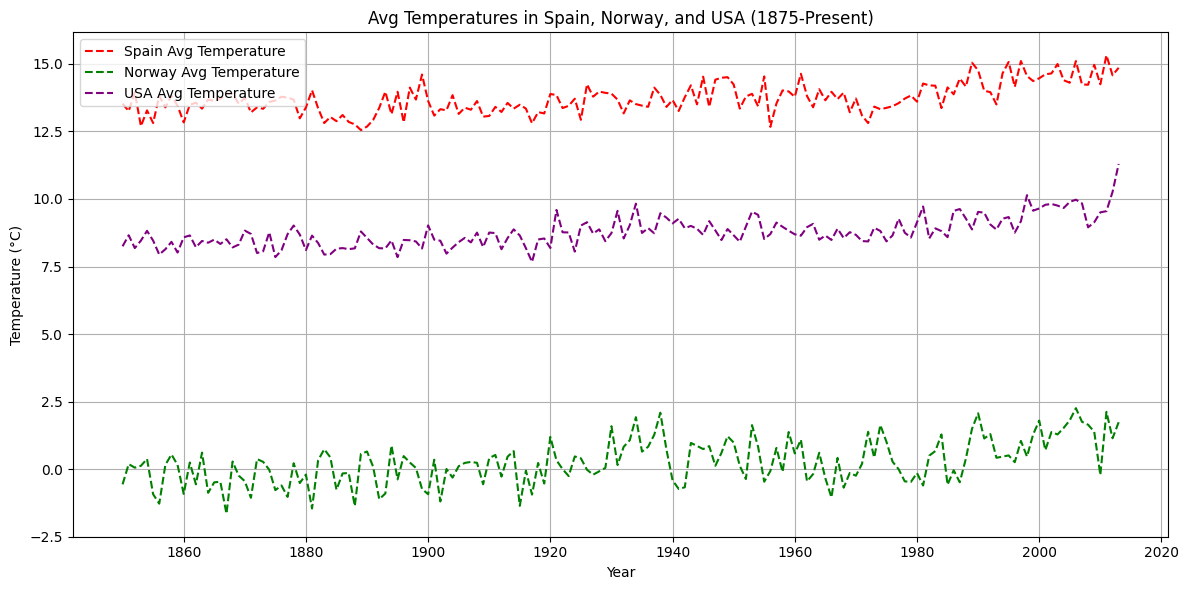

In [10]:
# CAmbiamos el formato de dt
temperature_country['dt'] = pd.to_datetime(temperature_country['dt'])
temperature_country['Year'] = temperature_country['dt'].dt.year

#Filtramos los datos para usar solo las temperaturas a partir de 1850, ya que la cantidad de Nan afecta la calidad de los datos.
temperature_country = temperature_country[temperature_country["dt"].dt.year >= 1850]

# Seleccionamos los países que queremos analizar
selected_countries = ['Spain', 'Norway', 'United States']  # Cambia "India" por la región que desees analizar
filtered_data = temperature_country[
    temperature_country['Country'].isin(selected_countries)
]

# Agrupamos los países por año y cogemos las medias anuales para un gráfico general de la evolución de las temperaturas
country_year_avg = filtered_data.groupby(['Year', 'Country'])['AverageTemperature'].mean().unstack()

# Generamos el gráfico
plt.figure(figsize=(12, 6))
plt.plot(country_year_avg.index, country_year_avg['Spain'], label='Spain Avg Temperature', color='red', linestyle='--')
plt.plot(country_year_avg.index, country_year_avg['Norway'], label='Norway Avg Temperature', color='green', linestyle='--')
plt.plot(country_year_avg.index, country_year_avg['United States'], label='USA Avg Temperature', color='purple', linestyle='--')
plt.title('Avg Temperatures in Spain, Norway, and USA (1875-Present)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

Las tendencias de la temperatura media son prácticamente las mismas en todos los países analizados, mostrando un aumento constante de las temperaturas. Sin embargo, este análisis tiene un límite ya que el intervalo de tiempo es muy pequeño en proporción con los millones de años que tiene la Tierra. No se puede realmente contrarrestar el argumento de que la Tierra se enfría y calienta a lo largo de varios periodos de tiempo.

Lo que sí está claro es que el supuesto gráfico de que las temperaturas medias no han subido no concuerda con los datos presentados aquí. Es importante puntualizar que los datos ya habían sido procesados previamente, ya que proporcionan la temperatura media mensual.

Dicho esto, hay una subida clara de las temperaturas medias desde 1850, con una subida mas pronunciada a finales del siglo 20 y principios del 21.

### Modelo de machine learning

El objetivo es implementar un modelo que consiga predecir la temperatura media futura de cada país.

Para ello, filtraremos el dataframe "GlobalLandTemperaturesByCountry" para solo conservar fechas, países y temperaturas.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ignorar advertencias para una salida más limpia
import warnings
warnings.filterwarnings('ignore')


In [12]:
# Volvemos a cargar el dataset limpio, guardandolo en una variable distinta
country_data = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

# Verificamos la cantidad de filas y columnas
print(f"\nDimensiones del dataset original: {country_data.shape}")


Dimensiones del dataset original: (577462, 4)


In [13]:
# Limpiar datos eliminando filas con valores nulos en 'AverageTemperature', la cantidad de datos es suficiente para poder eliminar los Nan.
country_data = country_data.dropna(subset=['AverageTemperature'])

# Convertir la columna 'dt' a tipo datetime y extraer el año
country_data['dt'] = pd.to_datetime(country_data['dt'])
country_data['Year'] = country_data['dt'].dt.year

# Filtrar años posteriores a 1850 ya que la cantidad más significativa de valores nulos se concentra antes de 1850
country_data = country_data[country_data['Year'] >= 1850]

# Agrupamos por País y Año para calcular la temperatura media anual
annual_country_data = country_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Verificamos que el dataset es correcto
print(annual_country_data.head())

       Country  Year  AverageTemperature
0  Afghanistan  1850           13.326083
1  Afghanistan  1851           13.605667
2  Afghanistan  1852           13.541167
3  Afghanistan  1853           13.455833
4  Afghanistan  1854           13.605750


In [14]:
# Verificamos la cantidad de países y años
num_countries = annual_country_data['Country'].nunique()
num_years = annual_country_data['Year'].nunique()
print(f"\nNúmero de países en el dataset: {num_countries}")
print(f"Número de años en el dataset: {num_years}")


Número de países en el dataset: 242
Número de años en el dataset: 164


Tras filtrar los datos, tenemos nos quedan una cantidad de 242 países con sus respectivas temperaturas a lo largo de un periodo de 164 años.

Ya podemos entrenar el modelo.

In [15]:
# En X las características y en "y" la variable objetivo.
X = annual_country_data[['Country', 'Year']]
y = annual_country_data['AverageTemperature']

# Dividir el dataset en entrenamiento y prueba (valores de 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (30348, 2)
Tamaño del conjunto de prueba: (7587, 2)


In [16]:
# Separar los valores categóricos de los numericos.
categorical_features = ['Country']
numerical_features = ['Year']

# Asigna valores binarios distintos a cada país para que el modelo puedo trabajar con ellos.
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

Tras probar varios modelos distintos, he conservador únicamente los modelos con mejores resultados para optimizar el tiempo de computación.

(El proceso con varios modelos ha tardado 3 minutos en completarse)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Definimos todos los modelos que queremos probar y establecemos un random_state.
models = {
    'Regresión Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5)
}

# Definir el número de pliegues (k)
k = 5 

# Crear el objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Diccionario para almacenar resultados
model_performance = {}

# Probar cada modelo
for model_name, model in models.items():
    print(f"\nEvaluando: {model_name}")
    
    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Realizar validación cruzada para MSE
    mse_scores = cross_val_score(
        pipeline, X_train, y_train, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False)
    )
    # Convertir MSE a positivo
    mse_scores = -mse_scores
    
    # Realizar validación cruzada para R²
    r2_scores = cross_val_score(
        pipeline, X_train, y_train, cv=kf, scoring='r2'
    )
    
    # Calcular métricas promedio
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)
    
    # Almacenar resultados
    model_performance[model_name] = {'Avg MSE': avg_mse, 'Avg R2': avg_r2}
    
    print(f"Promedio MSE: {avg_mse:.4f}")
    print(f"Promedio R²: {avg_r2:.4f}")






Evaluando: Regresión Lineal
Promedio MSE: 0.2133
Promedio R²: 0.9975

Evaluando: Random Forest
Promedio MSE: 0.2393
Promedio R²: 0.9972

Evaluando: KNN Regression
Promedio MSE: 0.2139
Promedio R²: 0.9975


Los mejores modelos son KNN, Regresión Lineal y Random Forest debido a su alto Cofficiente de Determinación (99,75%) y su bajo error promedio.

He decidido no usar Grid Search debido a la amplia cantidad de datos.

Grid Search usaba demasiados recursos y tardaba de media 5 minutos en completarse.

In [18]:
# Entrenar los modelos en el conjunto de entrenamiento completo
trained_models = {}

for model_name, model in models.items():
    print(f"\nEntrenando: {model_name}")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[model_name] = pipeline



Entrenando: Regresión Lineal

Entrenando: Random Forest

Entrenando: KNN Regression


In [23]:
# Crear una función para predecir con los modelos
def compare_models(models, test_cases):
    """
    Compara múltiples modelos entrenados para diferentes casos de prueba.
    
    Parámetros:
    - models: diccionario con los modelos entrenados.
    - test_cases: lista de tuplas (país, año).
    
    Retorna:
    - Resultados de las predicciones.
    """
    results = []
    
    for country, year in test_cases:
        print(f"\nPredicciones para: {country} - {year}")
        input_data = pd.DataFrame({'Country': [country], 'Year': [year]})
        
        for model_name, model in models.items():
            try:
                # Hacer predicción
                prediction = model.predict(input_data)[0]
                print(f"{model_name}: {prediction:.2f}°C")
                results.append({'Country': country, 'Year': year, 'Model': model_name, 'Prediction': prediction})
            except Exception as e:
                print(f"{model_name} no pudo realizar la predicción: {e}")
    
    return pd.DataFrame(results)

# Definir los modelos entrenados
trained_models = {
    'Regresión Lineal': trained_models['Regresión Lineal'],
    'Random Forest': trained_models['Random Forest'],
    'KNN Regression': trained_models['KNN Regression']
}

# Casos de prueba
test_cases = [
    ('Spain', 2025),
    ('Norway', 2025),
    ('France', 2025)  # Puedes agregar más casos
]

# Comparar los modelos
results_df = compare_models(trained_models, test_cases)
print("\nResultados de las Predicciones:")
print(results_df)





Predicciones para: Spain - 2025
Regresión Lineal: 14.51°C
Random Forest: 14.79°C
KNN Regression: 14.79°C

Predicciones para: Norway - 2025
Regresión Lineal: 1.03°C
Random Forest: 1.43°C
KNN Regression: 1.34°C

Predicciones para: France - 2025
Regresión Lineal: 13.67°C
Random Forest: 13.67°C
KNN Regression: 13.77°C

Resultados de las Predicciones:
  Country  Year             Model  Prediction
0   Spain  2025  Regresión Lineal   14.511865
1   Spain  2025     Random Forest   14.792194
2   Spain  2025    KNN Regression   14.794808
3  Norway  2025  Regresión Lineal    1.034205
4  Norway  2025     Random Forest    1.428520
5  Norway  2025    KNN Regression    1.336600
6  France  2025  Regresión Lineal   13.674716
7  France  2025     Random Forest   13.667942
8  France  2025    KNN Regression   13.765692


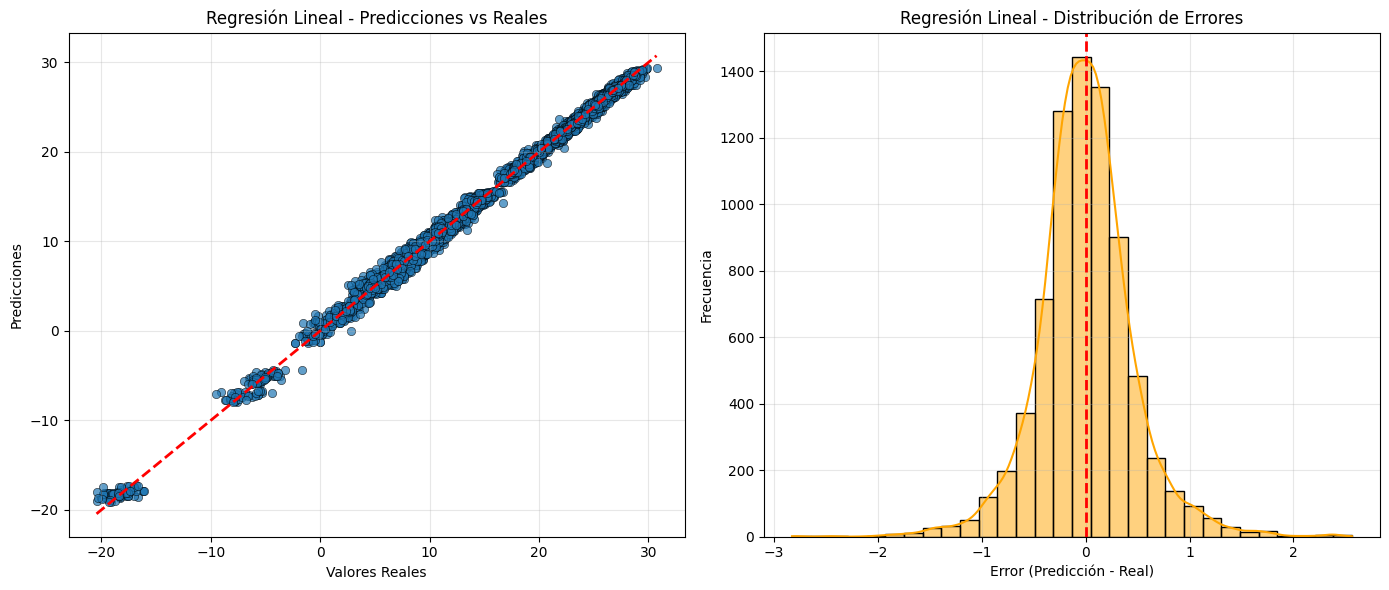

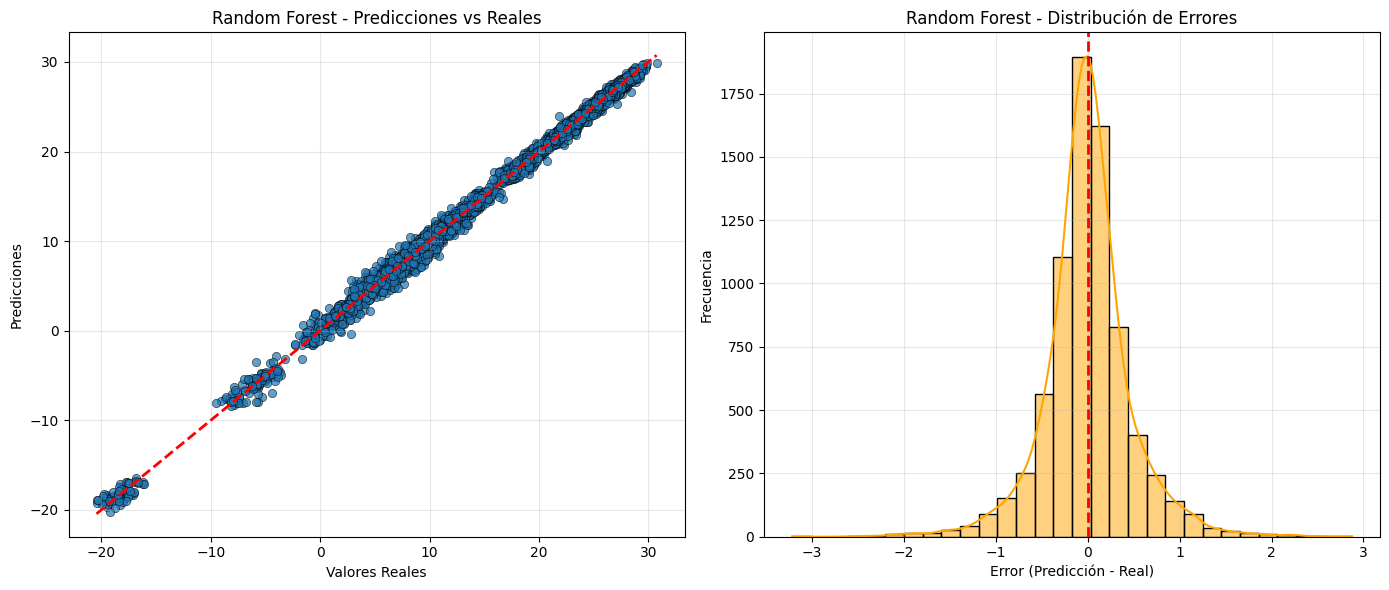

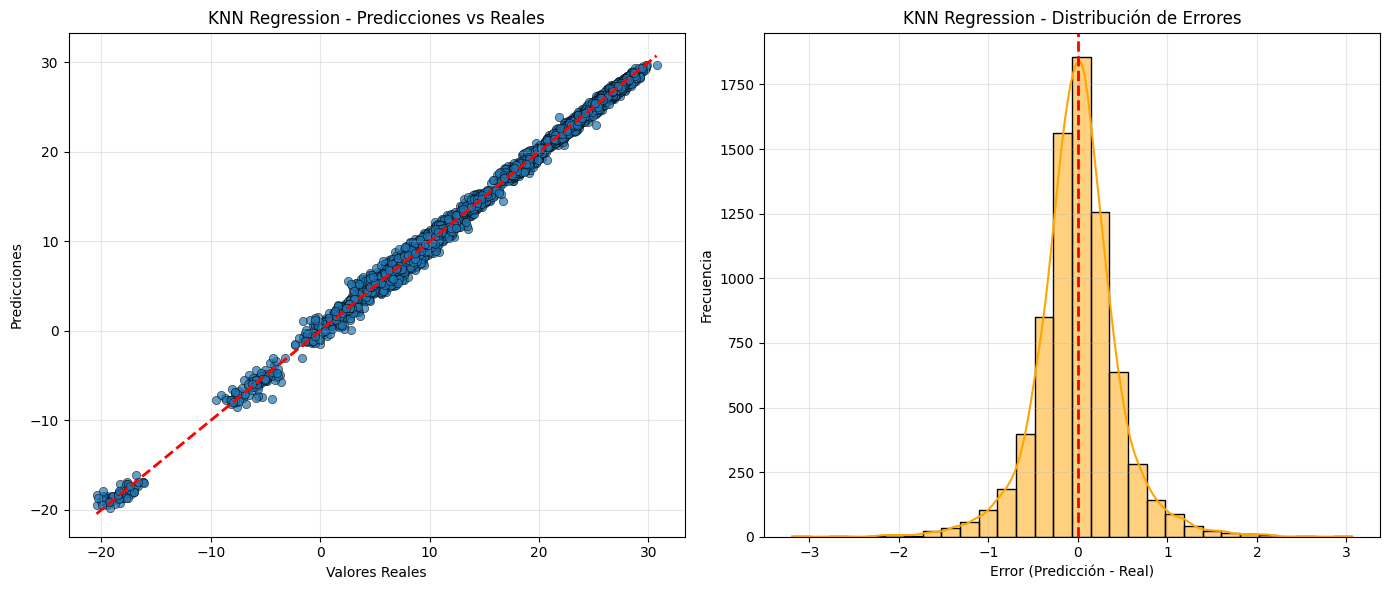

In [22]:
def plot_model_performance(y_true, y_pred, model_name):
    """
    Genera gráficos de Predicciones vs Reales y Errores para evaluar el rendimiento del modelo.
    
    Parámetros:
    - y_true: Valores reales.
    - y_pred: Valores predichos.
    - model_name: Nombre del modelo.
    """
    plt.figure(figsize=(14, 6))
    
    # Gráfico 1: Predicciones vs Reales
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"{model_name} - Predicciones vs Reales")
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.grid(True, alpha=0.3)
    
    # Gráfico 2: Diferencias (Error)
    plt.subplot(1, 2, 2)
    errors = y_pred - y_true
    sns.histplot(errors, bins=30, kde=True, color='orange')
    plt.axvline(0, color='red', linestyle='--', linewidth=2)
    plt.title(f"{model_name} - Distribución de Errores")
    plt.xlabel("Error (Predicción - Real)")
    plt.ylabel("Frecuencia")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Generar gráficos de rendimiento para cada modelo
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    plot_model_performance(y_test, y_pred, model_name)



## Conclusión

El trabajo ha sido menos revelador de lo esperado.

Vemos que las temperaturas globales han aumentado significativamente en el último siglo.
El gráfico que ví en su día en el que se mostraban las temperaturas medias anuales en España desde 1900 no habían subido.
Estos datos muestran todo lo contrario.
